### Data analysis of Section 15 data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.jet()

import sys
sys.path.insert(0, '../')
from M1S_tools import *
import glob

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
## bending modes & influence matrices etc from Buddy #####################
ML actuators =  165 165
Afn =  (6991, 165)
fv =  (165, 165)
U matrix (6991, 165)
N node =  6991
## bending modes & influence matrices etc from Trupti #####################
N actuators =  170
/Users/bxin/Library/CloudStorage/OneDrive-SharedLibraries-GMTOCorp/M1S Portal - Documents/influnce_matrix_files/OA_influence_matrices_all/OA_surface_normal_165SA_09Jan2025/
Afz =  (27547, 165)
U matrix (27547, 165)
S matrix (165, 165)

<Figure size 640x480 with 0 Axes>

In [3]:
dateID = '250306'
niter = 9
iter_offset = 0 #only used for +0.25mm z
ntsamples = 100
nBMs = 27
band_width = 4 #in minutes; how long it took for each measurement

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_1/250306 GMT3 set1avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_2/250306 GMT3 set2avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_3/250306 GMT3 set3avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_4/250306 GMT3 set4avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_5/250306 GMT3 set5avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 
/Users/bxin/GMT

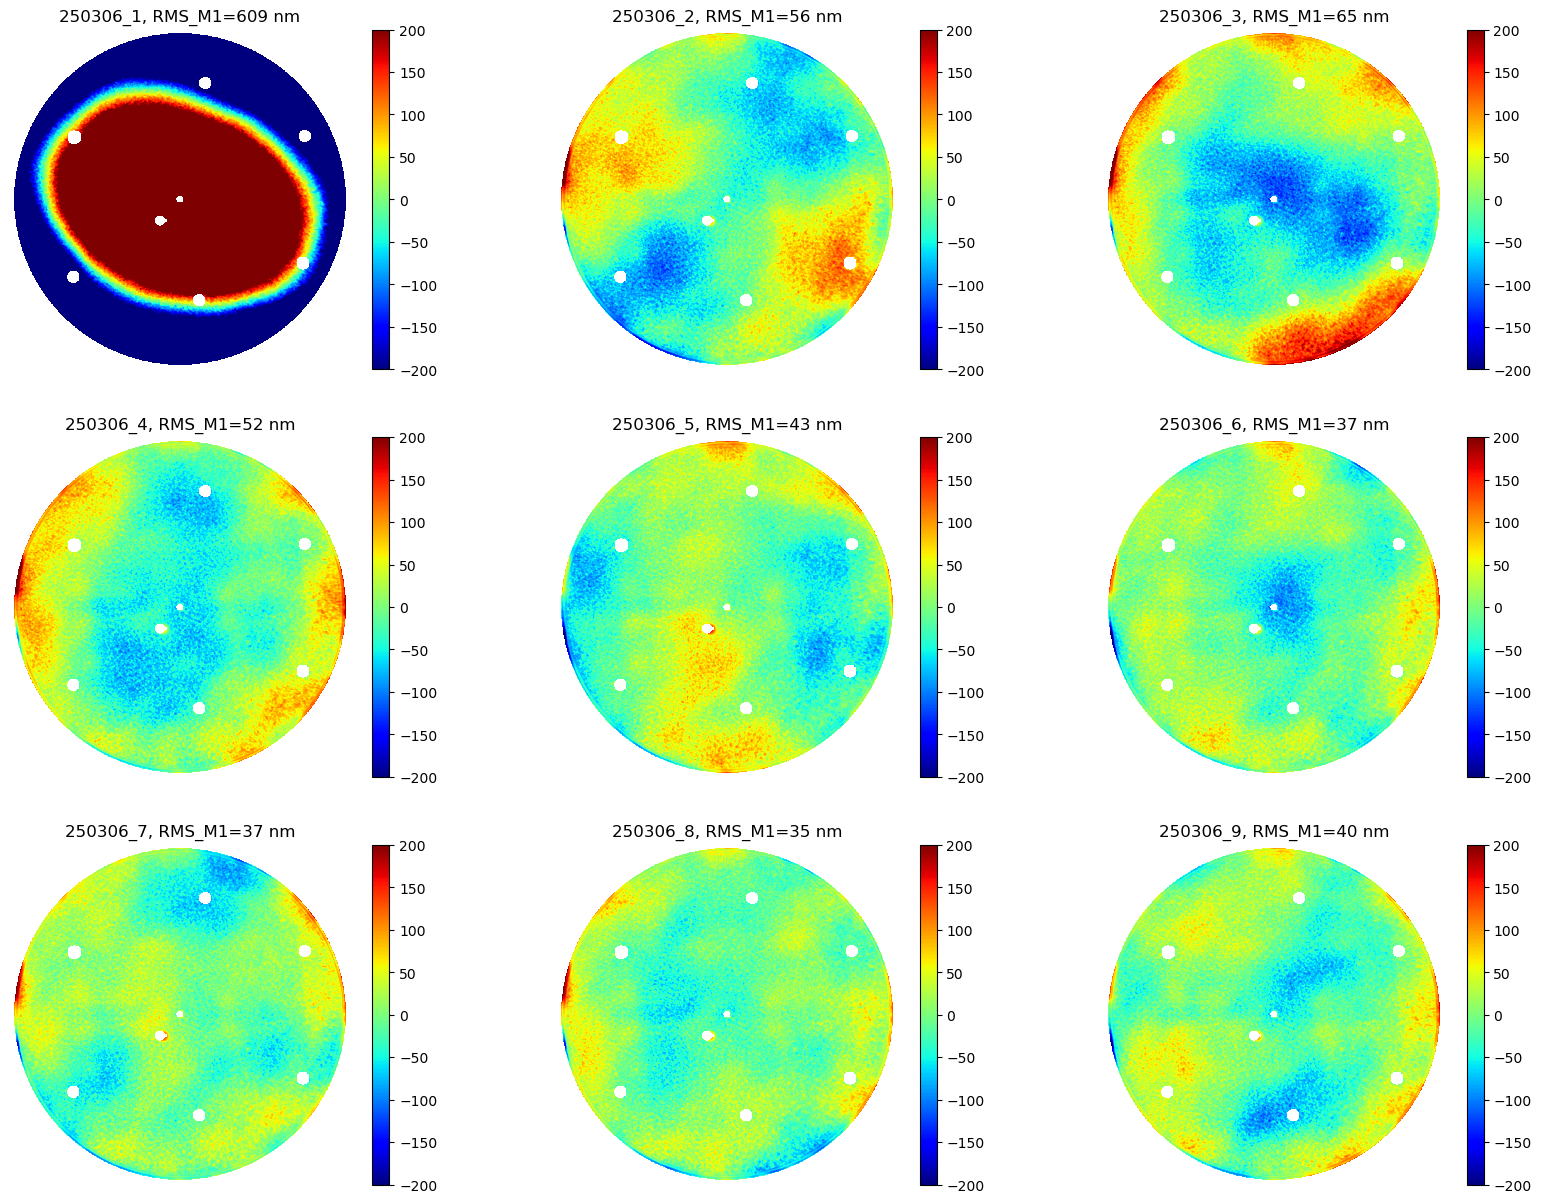

In [4]:
#plot processed maps from each iteration
m1s_array = np.zeros((Sxn, Syn, niter))
m1rms_array = np.zeros(niter)
nrow = int(np.ceil(niter/3.))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 15/-0.25mm z/%s_%s/%s*set*patched.h5'%(ml_data_dir,dateID, i+1+iter_offset, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    m1s_array[:,:, i] = m1s
    
    m1rms_array[i] = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1+iter_offset, m1rms_array[i]))
    ax[irow][icol].axis('off')
for i in range(nrow*3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    ax[irow][icol].axis('off')    

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_8/250306 GMT3 set8avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched.h5: date not in h5 file. 


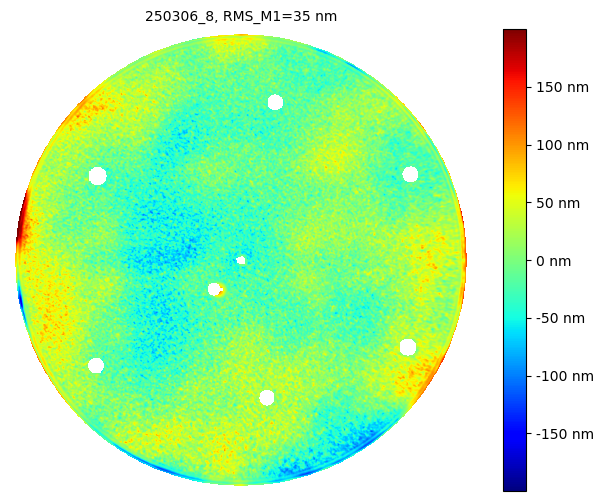

In [15]:
#make a plot for Barbara
fig, ax = plt.subplots(1,1,figsize=(8,6))

i = 8

fileset = sorted(glob.glob('%s/Sec 15/-0.25mm z/%s_%s/%s*set*patched.h5'%(ml_data_dir,dateID, i+iter_offset, dateID)))

assert len(fileset)==1 
m1s,centerRow1,centerCol1,pixelSize1,ts = readH5Map(fileset, apply_mask=True)

img = ax.imshow(m1s*1e3, origin='lower', vmin=-200, vmax=200)
cbar = fig.colorbar(img, ax=ax)
m1rms = np.std(m1s[~np.isnan(m1s)])*1e3
mytitle = '%s_%s, RMS_M1=%.0f nm'%(dateID,i+iter_offset, m1rms)
ax.set_title(mytitle, fontsize=10)
ticks = cbar.get_ticks()[1:-1]
cbar.set_ticks(ticks)
cbar.set_ticklabels([f"{tick:.0f} nm" for tick in ticks])
ax.axis('off')
plt.savefig("optimize_35nm.png", dpi=600, bbox_inches='tight')

In [4]:
#we have to retrieve timestamps from earlier stage data files
#below is only for retrieving timestamps
ts_array = []
for i in range(niter):
    globstring = '%s/Sec 15/-0.25mm z/%s_%s/%s*set*comp -.h5'%(ml_data_dir,dateID, i+1+iter_offset, dateID)
    fileset = sorted(glob.glob(globstring))
    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    temp,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    ts_array.append(ts)

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_1/250306 GMT3 set1avg 15.2 12 27 modes gmtMorph170614 LFSsub comp -.h5: Thu Mar 06 14:07:28 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_2/250306 GMT3 set2avg 15.2 12 27 modes gmtMorph170614 LFSsub comp -.h5: Thu Mar 06 14:24:00 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_3/250306 GMT3 set3avg 15.2 12 27 modes gmtMorph170614 LFSsub comp -.h5: Thu Mar 06 14:34:56 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_4/250306 GMT3 set4avg 15.2 12 27 modes gmtMorph170614 LFSsub comp -.h5: Thu Mar 06 14:46:22 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_5/250306 GMT3 set5avg 15.2 12 27 modes gmtMorph170614 LFSsub comp -.h5: Thu Mar 06 14:57:09 2025 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/2

/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_1/250306 GMT3 set1avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_2/250306 GMT3 set2avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_3/250306 GMT3 set3avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_4/250306 GMT3 set4avg 15.2 12 27 modes gmtMorph170614 LFSsub comp - stitched patched - 27 GMT modes.h5: date not in h5 file. 
/Users/bxin/GMT_docs/1_M1/Analysis/ml_data/data/Optical Data//Sec 15/-0.25mm z/250306_5/250306 GMT3 set5avg 15.2 12 27 modes gmtMorph170614 LFSsub comp 

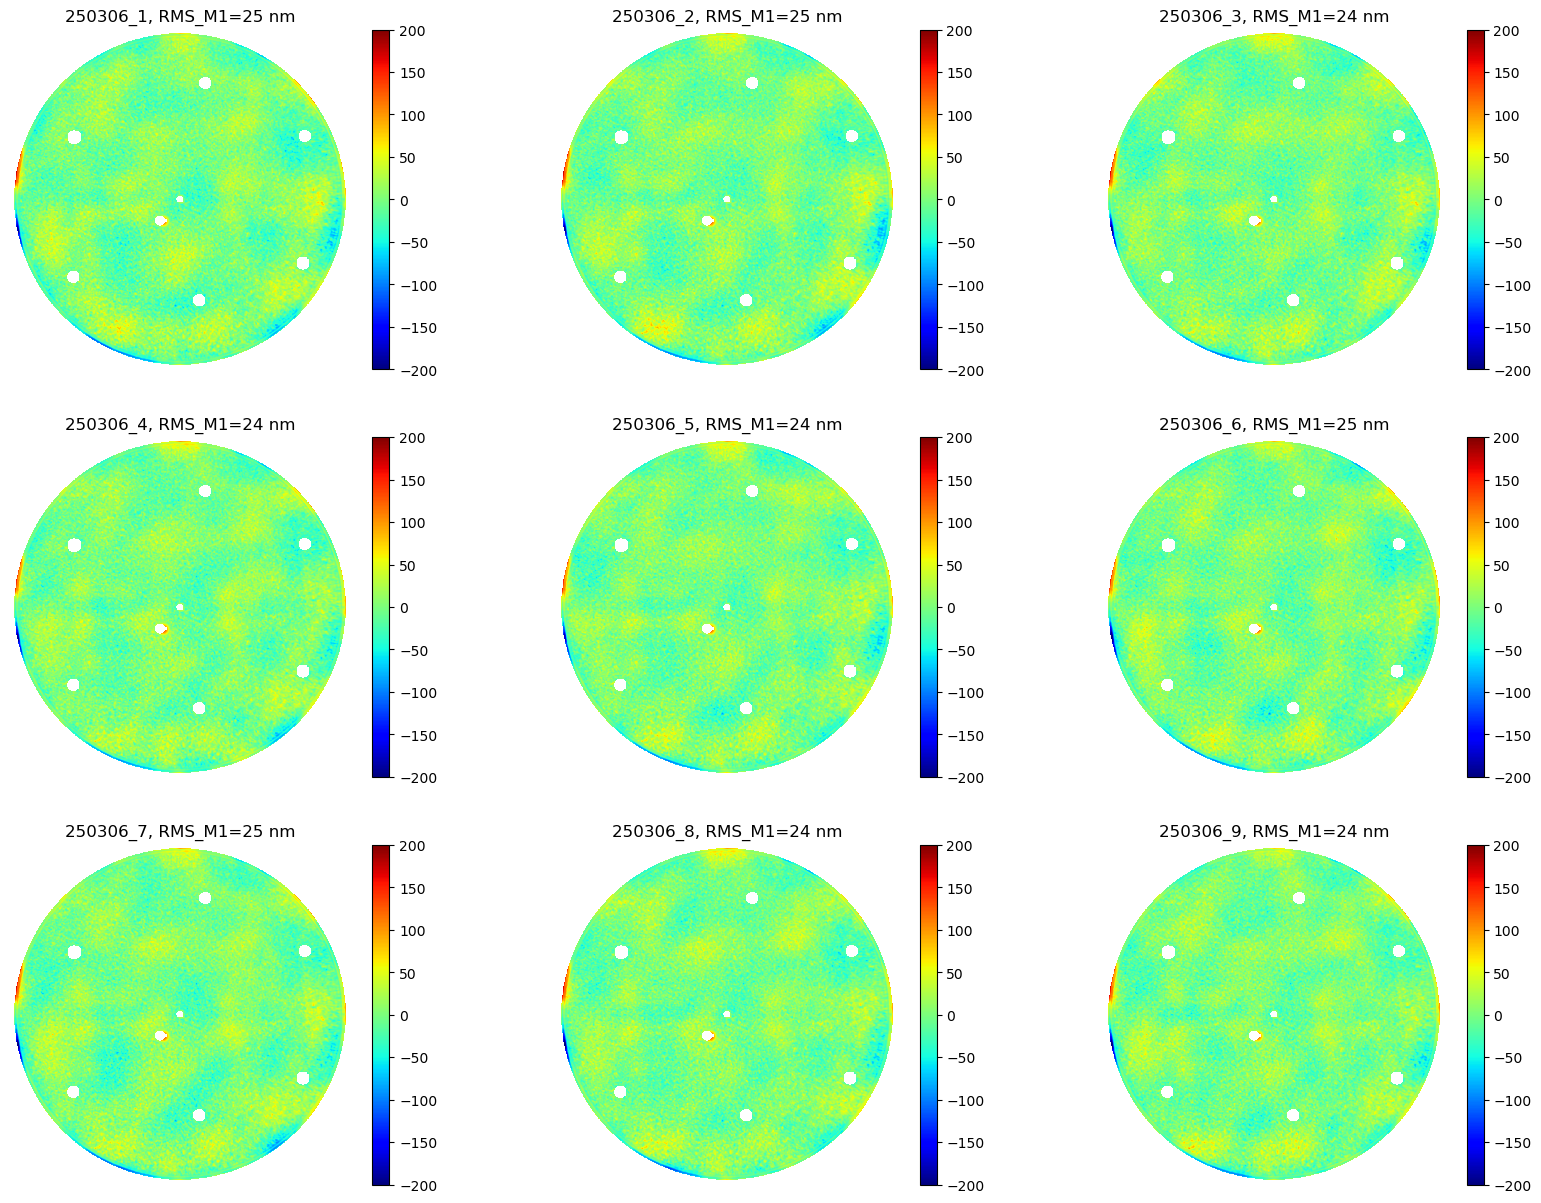

In [5]:
#predicted maps at each iteration
nrow = int(np.ceil(niter/4.))
fig, ax = plt.subplots(nrow,3,figsize=(20,5*nrow))
for i in range(niter):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    
    fileset = sorted(glob.glob('%s/Sec 15/-0.25mm z/%s_%s/%s*set*patched - 27 GMT modes.h5'%(
        ml_data_dir,dateID, i+1+iter_offset, dateID)))

    assert len(fileset)==1 #for optimization, Buddy decided to do ONE measurements per iteration
    m1s,centerRow,centerCol,pixelSize,ts = readH5Map(fileset)
    m1s *= 1000 #convert into nm
    
    m1rms = np.std(m1s[~np.isnan(m1s)])
    img = ax[irow][icol].imshow(m1s, origin='lower', vmin=-200, vmax=200)
    fig.colorbar(img, ax=ax[irow][icol])
    ax[irow][icol].set_title('%s_%s, RMS_M1=%.0f nm'%(dateID,i+1+iter_offset, m1rms))
    ax[irow][icol].axis('off')
for i in range(nrow*3):
    irow = np.int8(i/3)
    icol = np.mod(i,3)
    ax[irow][icol].axis('off')    

In [6]:
# fit surface map from each iteration to Zernike
#nzer = int(#(6*7)/2+1)
nzer = int((8*9)/2+1) 
zercoeff = np.zeros((niter, nzer))

[x1, y1] = mkXYGrid(m1s, centerRow, centerCol, pixelSize)
r1 = np.sqrt(x1**2 + y1**2)

nnodes = x1.shape[0]*x1.shape[1]
zerU = np.zeros((nnodes, nzer))
for izer in range(nzer):
    zerU[:,izer] = zernike_polynomial(izer+1, x1/radius_of_CA, y1/radius_of_CA).flatten()
for i in range(niter):
    m1s = np.squeeze(m1s_array[:,:,i])
    maskNew = (~np.isnan(m1s) ) & (r1<radius_of_CA)
    nnodesNew = np.sum(maskNew)
    zercoeff[i,:] = zerU[maskNew.flatten(),:].transpose() / nnodesNew @ m1s[maskNew]

In [7]:
## define continuous timestamps
start_time = unix_ts(ts_array[0])-60*6 - 60 #1 minute before starting the first measurement
end_time = unix_ts(ts_array[-1])+60*5 #5 minute after the last measurement
#get continuous mirror positions
mirror_pos_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/mirror_position/value', 
                                   duration_in_s=end_time-start_time, samples=ntsamples)
#get continuous bending forces
bend_force_ntsamples, tt = getDBData(start_time,'m1_s1_support_ctrl/s/sa_bending_force/value', 
                           duration_in_s=end_time-start_time, samples=ntsamples)
bend_force_z_ntsamples = bend_force_ntsamples[:,:,2]
# convert continuous forces to continuous BM coeffs.
bm_coeff_ntsamples = np.zeros((ntsamples, nBMs))
for i in range(ntsamples):
    bm_coeff_ntsamples[i,:] = VMat[:, :nBMs].transpose() @ gmt170Fvec2gmt165Fvec(bend_force_z_ntsamples[i,:]) \
        / np.sum(VMat[:,:nBMs]**2, axis=0)

m1_s1_support_ctrl/s/mirror_position/value
2025-03-06 14:00:28  duration =  6509  s
(100, 6)
m1_s1_support_ctrl/s/sa_bending_force/value
2025-03-06 14:00:28  duration =  6509  s
(100, 170, 3)


In [8]:
# get TC data
tc, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/tc_temperature/value', 
                   duration_in_s=end_time-start_time, samples=ntsamples)
tambient, tt = getDBData(start_time,'m1_s1_thermal_ctrl/i/ambient_temperature/value', 
                         duration_in_s=end_time-start_time, samples=ntsamples)
idxfo = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) > 4
idxfi = np.sqrt(tc_locs[idx_mirror_f,0]**2+tc_locs[idx_mirror_f,1]**2) < 1
idxbo = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) > 4
idxbi = np.sqrt(tc_locs[idx_mirror_b,0]**2+tc_locs[idx_mirror_b,1]**2) < 1

m1_s1_thermal_ctrl/i/tc_temperature/value
2025-03-06 14:00:28  duration =  6509  s
(100, 192)
m1_s1_thermal_ctrl/i/ambient_temperature/value
2025-03-06 14:00:28  duration =  6509  s
(100,)


In [1]:
plotOptimization(m1s_array, m1rms_array, ts_array, zercoeff, ntsamples, bm_coeff_ntsamples, tt, mirror_pos_ntsamples, tambient, tc, band_width, iter_offset)

NameError: name 'plotOptimization' is not defined